In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv('master_dataset.csv', sep='\t', encoding='utf-8')

df.dropna(subset = ["status", "branchetekst", "_source.Vrvirksomhed.virksomhedMetadata.nyesteBeliggenhedsadresse.kommune.kommuneNavn"], inplace=True)
del df['_index']
df = df.replace({'IVS': 0})
df = df.replace({'K/S': 0})
df = df.replace({'APS': 1})
df = df.replace({'A/S': 0})
df = df.replace({'KAS': 0})
df = df.replace({'FAP': 0})
df = df.replace({'EFO': 0})
df = df.replace({'I/S': 0})
df = df.replace({'FAS': 0})
df = df.replace({'FMA': 0})
df = df.replace({'FBA': 0})
df = df.replace({'ABA': 0})
df = df.replace({'FIV': 0})
df = df.replace({'SCE': 0})
df = df.replace({'MSS': 0})
df = df.replace({'FOR': 0})

df['date_time']=pd.to_datetime(df['_source.Vrvirksomhed.virksomhedMetadata.stiftelsesDato'], format='%Y-%m-%d')
df['Day_year'] = df['date_time'].dt.year
df['Day_month'] = df['date_time'].dt.month

#Kun features ikke y
X = df[['status', 'Day_month', 'Day_year', '_source.Vrvirksomhed.virksomhedMetadata.nyesteBeliggenhedsadresse.kommune.kommuneNavn', 'branchekode']]
#Target
y = df['_source.Vrvirksomhed.virksomhedMetadata.nyesteVirksomhedsform.kortBeskrivelse']



C:\Users\ander\anaconda3\envs\BDP\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [3]:
y_test2 =[]
for i in y_test:
    y_test2.append(i)

y_train2 =[]
for x in y_train:
    y_train2.append(x)
 

In [4]:
import numpy as np

X2_train_kb = X_train[['status']].values
X2_train_m = X_train[['Day_month']].values
X2_train_y = X_train[['Day_year']].values
X2_train_bynavn = X_train[['_source.Vrvirksomhed.virksomhedMetadata.nyesteBeliggenhedsadresse.kommune.kommuneNavn']].values
X2_train_KODE = X_train[['branchekode']].values

X2_test_kb = X_test[['status']].values
X2_test_m = X_test[['Day_month']].values
X2_test_y = X_test[['Day_year']].values
X2_test_bynavn = X_test[['_source.Vrvirksomhed.virksomhedMetadata.nyesteBeliggenhedsadresse.kommune.kommuneNavn']].values
X2_test_KODE = X_test[['branchekode']].values

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
X2_train_bynavn = label_encoder.fit_transform(X2_train_bynavn)
X2_train_m = label_encoder.fit_transform(X2_train_m)
X2_train_y = label_encoder.fit_transform(X2_train_y)
X2_train_kb = label_encoder.fit_transform(X2_train_kb)
X2_train_ko = label_encoder.fit_transform(X2_train_KODE)

X2_test_bynavn = label_encoder.fit_transform(X2_test_bynavn)
X2_test_m = label_encoder.fit_transform(X2_test_m)
X2_test_y = label_encoder.fit_transform(X2_test_y)
X2_test_kb = label_encoder.fit_transform(X2_test_kb)
X2_test_ko = label_encoder.fit_transform(X2_test_KODE)




X2_train = np.dstack((X2_train_bynavn, X2_train_kb, X2_train_m, X2_train_y, X2_train_ko))
X2_test = np.dstack((X2_test_bynavn, X2_test_kb, X2_test_m, X2_test_y, X2_test_ko))

#Preperation over

C:\Users\ander\anaconda3\envs\BDP\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [5]:
X2_train = np.reshape(X2_train, (110030,5)) 
X2_test = np.reshape(X2_test, (27508,5)) 

dataset2 = np.dstack((X2_test_bynavn, X2_test_kb, X2_test_m, X2_test_y, X2_test_ko, y_test2))
dataset = np.dstack((X2_train_bynavn, X2_train_kb, X2_train_m, X2_train_y, X2_train_ko, y_train2))

In [6]:
dataset2 = np.reshape(dataset2, (27508,6))
dataset = np.reshape(dataset, (110030,6))
dataset2.shape
df2 = pd.DataFrame(np.array(dataset), columns=['1', '2', '3', '4', '5', '6'])
df3 = pd.DataFrame(np.array(dataset2), columns=['1', '2', '3', '4', '5', '6'])
dataset = pd.concat([df2,df3], ignore_index=True)


In [7]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
dataset = Sc.fit_transform(dataset)
X2_train = Sc.fit_transform(X2_train)
X2_test = Sc.fit_transform(X2_test)


In [8]:
#Import linear regression
from sklearn.linear_model import LinearRegression
#Assign function to variable
model_multiple= LinearRegression()
model_multiple.fit(X2_train,y_train)
accuracy_test_multiple = round(model_multiple.score(X2_test,y_test),5)
accuracy_test_multiple

0.20659

In [9]:
model_multiple.coef_

array([ 0.01256156, -0.0909745 ,  0.07565155,  0.16312846,  0.00092192])

In [10]:
# Import statsmodels to dive into the statistical aspect of modeling
import statsmodels.api as sm
from scipy import stats

In [11]:
# create the ols model and fit it on the train data
model_ols = sm.OLS(endog = y_train.astype(int), exog = X2_train.astype(int)).fit()

In [12]:
# get the model's residuals
residuals = model_ols.resid
#get the fitted values 
fitted_values = model_ols.fittedvalues

C:\Users\ander\anaconda3\envs\BDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


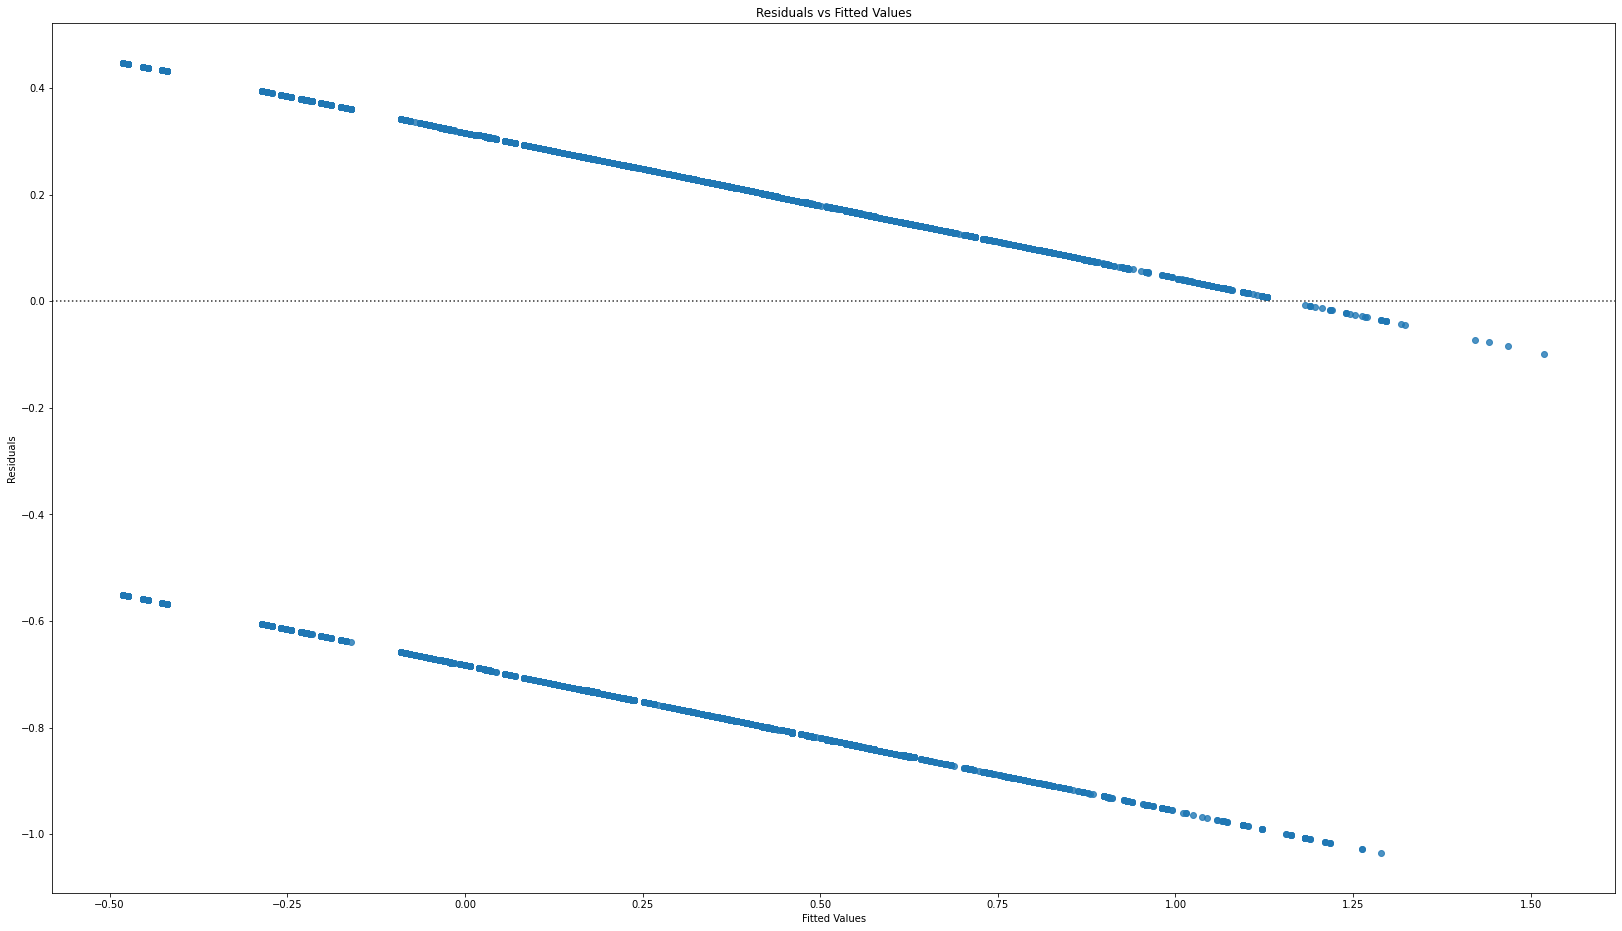

In [13]:
plt.figure(figsize=(28,16)) 

ax = sns.residplot(fitted_values, residuals)

ax.set_title('Residuals vs Fitted Values')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

plt.show()

In [14]:
print(model_ols.ssr)

67701.73914425565


In [15]:
#PCA
x2=X2_train
y_PCA=y_train

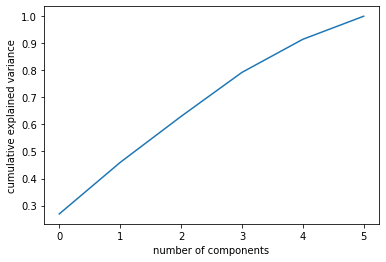

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(dataset)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');